Version de TensorFlow: 2.20.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 112s 4us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 70s 16us/step
=== Dimensions et types ===
Entraînement - Images: (60000, 28, 28), Labels: (60000,)
Test - Images: (10000, 28, 28), Labels: (10000,)
Type de données: uint8
Plage de valeurs: [0, 255]


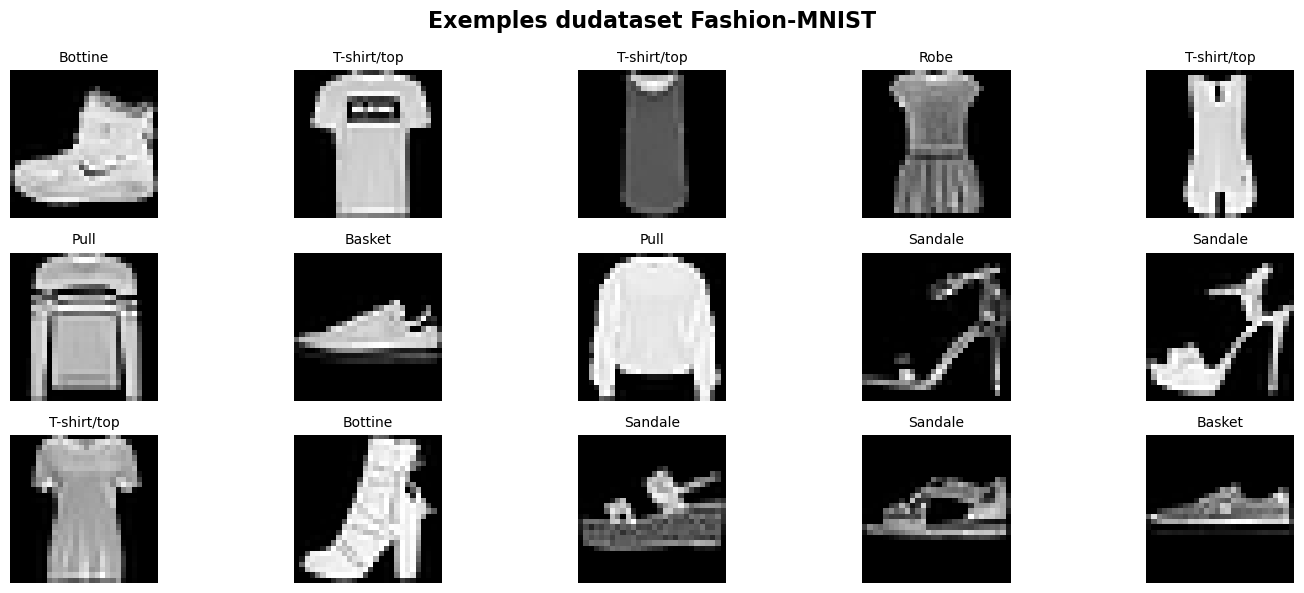

In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
print(f"Version de TensorFlow: {tf.__version__}")
# etape1 - Chargementt et exploratuon du dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Noms desclasses
class_names = ['T-shirt/top', 'Pantalon', 'Pull', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Basket', 'Sac', 'Bottine']
# A. Dimensions et types
print("=== Dimensions et types ===")
print(f"Entraînement - Images: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test - Images: {x_test.shape}, Labels: {y_test.shape}")
print(f"Type de données: {x_train.dtype}")
print(f"Plage de valeurs: [{x_train.min()}, {x_train.max()}]")
# B. Visualisation dexemples
plt.figure(figsize=(15, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=10)
    plt.axis('off')
plt.suptitle("Exemples dudataset Fashion-MNIST", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
Etape 1 : Exploration
Que remarquez-vous sur la nature des donnees et la taille des images ?

Meme format que MNIST (28×28, niveaux de gris)
Mais plus complexe : vetements avec textures et formes variees
10 classes de vetements differents

In [3]:
# Étape 2 --Prtraitement des donnes
# Normalisation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# One-hot encoding des labels
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
print(f"\nAprès prétraitement:")
print(f"x_train shape: {x_train.shape}, type: {x_train.dtype}")
print(f"y_train_cat shape: {y_train_cat.shape}")
print(f"Exemple de label one-hot: {y_train_cat[0]}")


Après prétraitement:
x_train shape: (60000, 28, 28), type: float32
y_train_cat shape: (60000, 10)
Exemple de label one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
Etape 2 : Pretraitement

Pourquoi faut-il normalise les images ?
Memes raisons que l'exercice 1 : convergence plus rapide, stabilite numerique
Quelle est l'importance du one-hot encoding dans un probleme de classification multiclasse ?
Transforme les labels (0-9) en vecteurs binaires permettant au modele de calcule la perte pour chaque classe independamment

In [4]:
# Étape 3 - Creation dun modele Dense(ANN)
model_ann = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
], name='ANN_Model')
model_ann.summary()
# Compilation
model_ann.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
history_ann = model_ann.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1)
test_loss_ann, test_acc_ann = model_ann.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nPrécision ANN sur le test: {test_acc_ann * 100:.2f}%")

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "ANN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7689 - loss: 0.6497 - val_accuracy: 0.8426 - val_loss: 0.4318
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8375 - loss: 0.4513 - val_accuracy: 0.8623 - val_loss: 0.3797
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8529 - loss: 0.4031 - val_accuracy: 0.8673 - val_loss: 0.3662
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8630 - loss: 0.3808 - val_accuracy: 0.8764 - val_loss: 0.3460
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8683 - loss: 0.3620 - val_accuracy: 0.8764 - val_loss: 0.3412
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8720 - loss: 0.3485 - val_accuracy: 0.8795 - val_loss: 0.3312
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8760 - loss: 0.3382 - val_accuracy: 0.8806 - val_loss: 0.3332
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8795 - loss: 0.3278 - val_accuracy: 0.

In [ ]:
Etape 3 : Modele ANN
Pourquoi utilise-t-on la fonction d'activation ReLU ici ?
Simple et efficace
Evite le probleme de vanishing gradient
Convergence rapide
Cout de calcul faible
Quelle est la difference entre accuracy et val_accuracy ?
accuracy : precision sur les donnees d'entrainement
val_accuracy : precision sur les donnees de validation (indicateur de generalisation)
Que se passe-t-il si l'on augmente le nombre d'epoques a 50 ?
Risque eleve de surapprentisage si pas de regularisation


=== Test avec sigmoid ===
Précision finale: 87.17%

=== Test avec tanh ===
Précision finale: 87.06%

=== Test avec relu ===
Précision finale: 87.90%

=== Test avec LeakyReLU ===


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Précision finale: 87.79%


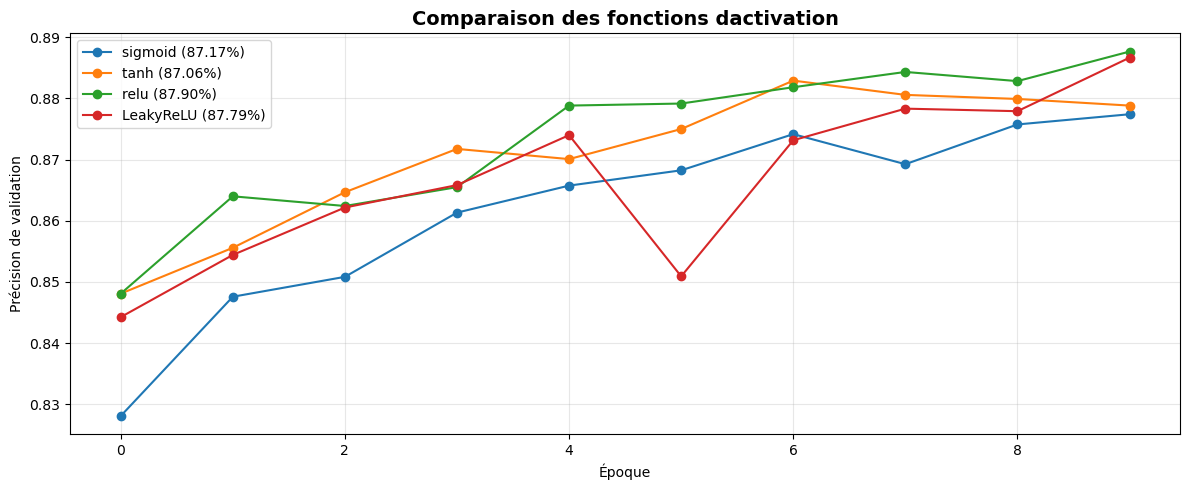

In [6]:
# Étape 4 - Comparaison des fonctions d'activation
activations = ['sigmoid', 'tanh', 'relu', 'LeakyReLU']
results = {}

for activation in activations:
    print(f"\n=== Test avec {activation} ===")
    
    model_temp = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation=activation if activation != 'LeakyReLU' else None),
    ])
    
    # Ajouter LeakyReLU si nécessaire
    if activation == 'LeakyReLU':
        model_temp.add(layers.LeakyReLU(alpha=0.1))
    
    model_temp.add(layers.Dense(10, activation='softmax'))
    
    model_temp.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history_temp = model_temp.fit(
        x_train, y_train_cat,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        verbose=0
    )
    
    _, test_acc = model_temp.evaluate(x_test, y_test_cat, verbose=0)
    results[activation] = {
        'history': history_temp,
        'test_accuracy': test_acc
    }
    print(f"Précision finale: {test_acc * 100:.2f}%")

# Visualisation comparative
plt.figure(figsize=(12, 5))
for activation, data in results.items():
    plt.plot(data['history'].history['val_accuracy'], 
             label=f"{activation} ({data['test_accuracy']*100:.2f}%)",
             marker='o')

plt.title('Comparaison des fonctions dactivation', fontsize=14, fontweight='bold')
plt.xlabel('Époque')
plt.ylabel('Précision de validation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
Etape 4 : Fonctions d'activation

Quelle fonction d'activation donne les meilleurs resultats ?
Generalement ReLU ou LeakyReLU pour Fashion-MNIST
Pourquoi les fonctions sigmoide et tanh sont moins utilise dans les couches cachees ?


Probleme du vanishing gradient : gradients tres petits en regions saturees
Convergence lente
ReLU est plus efficace computationnellement


A quoi sert LeakyReLU ?
Variante de ReLU qui permet un petit gradient negatif (evite les neurones "morts" ou ReLU donne toujours 0)

In [7]:
# etape5
# Reshape pour CNN 
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name='CNN_Model')

model_cnn.summary()

# Compilation
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entraînement
history_cnn = model_cnn.fit(
    x_train_cnn, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"\nPrécision CNN sur le test: {test_acc_cnn * 100:.2f}%")
# Comparaison ANN vs CNN
print(f"\n=== COMPARAISON ===")
print(f"ANN: {test_acc_ann * 100:.2f}%")
print(f"CNN: {test_acc_cnn * 100:.2f}%")
print(f"Amélioration: +{(test_acc_cnn - test_acc_ann) * 100:.2f}%")

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.7324 - loss: 0.7277 - val_accuracy: 0.8438 - val_loss: 0.4252
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.8416 - loss: 0.4386 - val_accuracy: 0.8726 - val_loss: 0.3449
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8683 - loss: 0.3661 - val_accuracy: 0.8752 - val_loss: 0.3264
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.8817 - loss: 0.3285 - val_accuracy: 0.8891 - val_loss: 0.2998
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.8925 - loss: 0.2982 - val_accuracy: 0.8952 - val_loss: 0.2804
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8986 - loss: 0.2803 - val_accuracy: 0.8992 - val_loss: 0.2711
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9054 - loss: 0.2617 - val_accuracy: 0.8963 - val_loss: 0.2762
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9097 - loss: 0.2446 - 

In [ ]:
Etape 5 : CNN

Quelle est la difference entre un ANN et un CNN ?
ANN : traite limage comme un vecteur plat, perd la structure spatiale
CNN : preserve la structure 2D, extrait des features locales (contours, textures) via convolutions
Pourquoi le CNN donne-t-il generalement de meilleurs resultats ?
Exploite la structure spatiale des images
Invariance par translation
Partage de poids (moins de parametres)
Extraction hierarchique de features
Quel est le role des couches de Pooling ?
Reduction de dimensionnalite
Invariance aux petites translations
Extraction des features dominantes
Reduction du cout computationnel

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


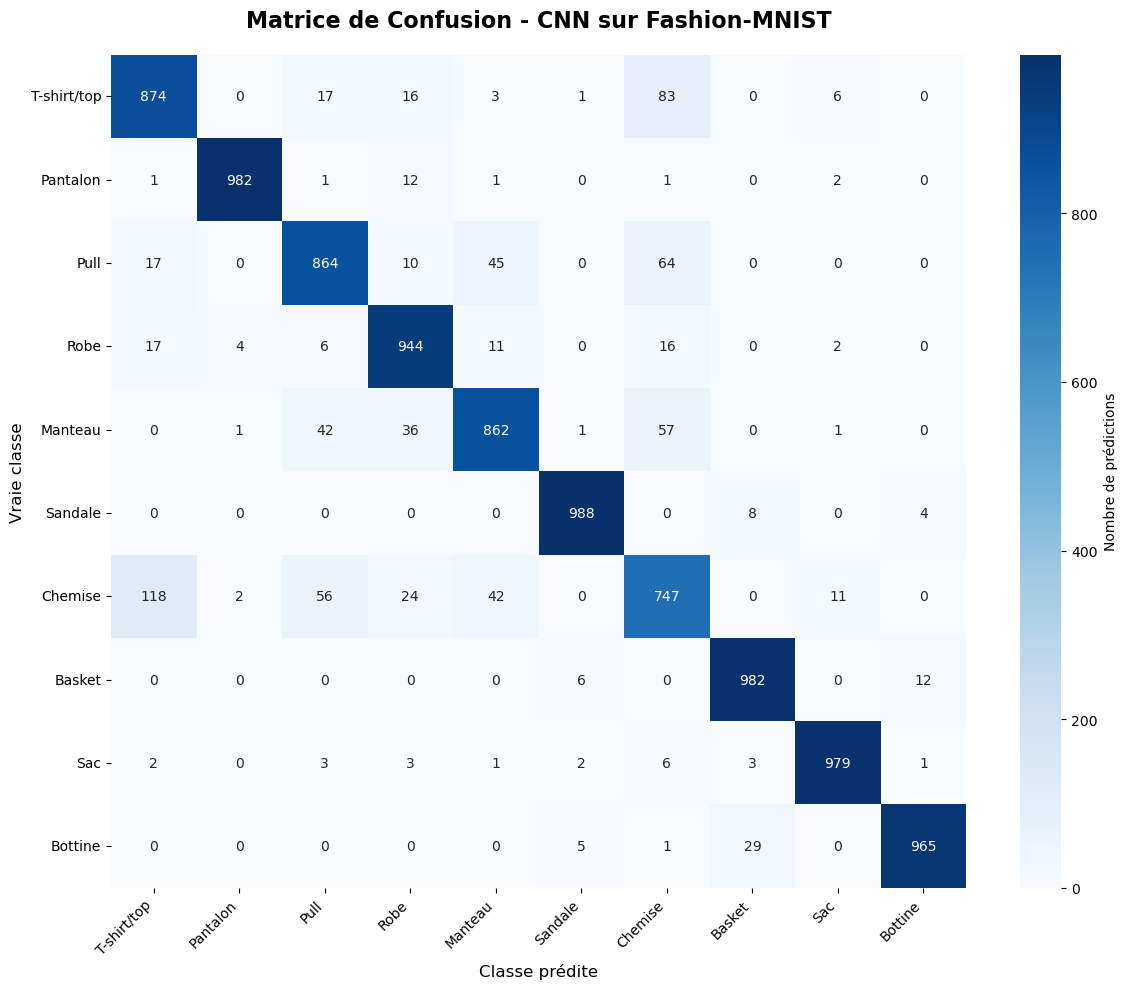


=== Rapport de classification ===
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
    Pantalon       0.99      0.98      0.99      1000
        Pull       0.87      0.86      0.87      1000
        Robe       0.90      0.94      0.92      1000
     Manteau       0.89      0.86      0.88      1000
     Sandale       0.99      0.99      0.99      1000
     Chemise       0.77      0.75      0.76      1000
      Basket       0.96      0.98      0.97      1000
         Sac       0.98      0.98      0.98      1000
     Bottine       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [8]:
# etape 6 
# Prédictions
y_pred_cnn = model_cnn.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names,
            cbar_kws={'label': 'Nombre de prédictions'})
plt.title('Matrice de Confusion - CNN sur Fashion-MNIST', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Vraie classe', fontsize=12)
plt.xlabel('Classe prédite', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Rapport de classification
print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

In [ ]:
Etape 6 : Visualisation

Quelles classes sont le plus souvent confondues ?
Typiquement : T-shirt/Pull, Chemise/Pull, Sandale/Basket, Sac/Bottine
Comment peut-on reduire ces erreurs de classification ?


Reseau plus profond
Data Augmentation
Ajout de couches convolutives
Techniques d'ensemble (ensemble learning)

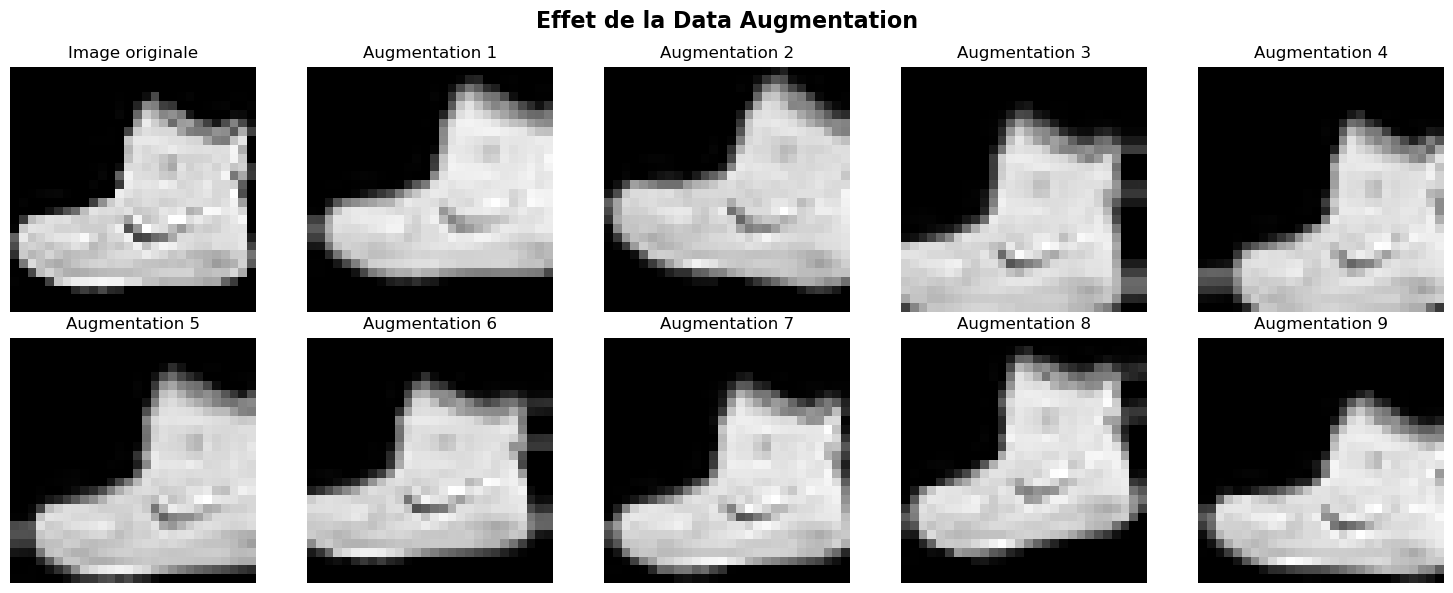

Epoch 1/20


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.6653 - loss: 0.9009 - val_accuracy: 0.7699 - val_loss: 0.5894
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.7662 - loss: 0.6239 - val_accuracy: 0.8121 - val_loss: 0.4811
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.7916 - loss: 0.5526 - val_accuracy: 0.8360 - val_loss: 0.4303
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.8095 - loss: 0.5070 - val_accuracy: 0.8401 - val_loss: 0.4200
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.8241 - loss: 0.4718 - val_accuracy: 0.8608 - val_loss: 0.3722
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.8378 - loss: 0.4425 - val_accuracy: 0.8769 - val_loss: 0.3361
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.8437 - loss: 0.4243 - val_accuracy: 0.8756 - val_loss: 0.3355
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.8513 - loss: 0.4063 - val_accurac

In [9]:
# Étape 7 - Data Augmentation
# Créer un générateur avec augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False  # Pas de flip pour les vêtements
)

# Visualiser l'effet de l'augmentation
plt.figure(figsize=(15, 6))
sample_image = x_train[0].reshape(1, 28, 28, 1)

plt.subplot(2, 5, 1)
plt.imshow(x_train[0], cmap='gray')
plt.title('Image originale')
plt.axis('off')

# Générer 9 versions augmentées
for i, batch in enumerate(datagen.flow(sample_image, batch_size=1)):
    if i >= 9:
        break
    plt.subplot(2, 5, i + 2)
    plt.imshow(batch[0].reshape(28, 28), cmap='gray')
    plt.title(f'Augmentation {i+1}')
    plt.axis('off')

plt.suptitle('Effet de la Data Augmentation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

model_cnn_aug = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_cnn_aug.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_aug = model_cnn_aug.fit(
    datagen.flow(x_train_cnn, y_train_cat, batch_size=128),
    epochs=20,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)
test_loss_aug, test_acc_aug = model_cnn_aug.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"Precision avec Data Augmentation: {test_acc_aug * 100:.2f}%")

In [ ]:
Etape 7 : Data Augmentation

Quel est linteret de la Data Augmentation ?
Augmente artificiellement la taille du dataset
Ameliore la generalisation
Reduit le surapprentisage
Rend le modele plus robuste aux variations
Quels types de transformations semblent les plus efficaces pour ce dataset ?
Rotations legeres
Translations
Zoom
Retournement horizontal (attention : pas pertinent pour tous les vetements)